In [201]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import json
import ast
from wordcloud import WordCloud,STOPWORDS
from collections import OrderedDict, Counter

train_path = 'C:/Users/bais_/OneDrive/Desktop/Università/Informatica/Data & Web Mining/Progetto/train.csv'
test_path = 'C:/Users/bais_/OneDrive/Desktop/Università/Informatica/Data & Web Mining/Progetto/test.csv'
#train_path = 'C:/Users/mcdav/Desktop/Università/Data&Web/train.csv'
#test_path = 'C:/Users/mcdav/Desktop/Università/Data&Web/test.csv'

def str_to_list(x):
    return eval(x) if x and x != '#N/A' else []

list_cols = [
    'genres',
    'belongs_to_collection',
    'production_companies',
    'production_countries',
    'spoken_languages',
    'Keywords',
    'cast',
    'crew'
]

io_params = {
    'index_col': 'id',
    'converters': {col: str_to_list for col in list_cols}
}

# We can read the train and the test in one go using the concat function
train = pd.read_csv(train_path, **io_params)
train.info()
train.describe()
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  3000 non-null   object 
 1   budget                 3000 non-null   int64  
 2   genres                 3000 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   overview               2992 non-null   object 
 8   popularity             3000 non-null   float64
 9   poster_path            2999 non-null   object 
 10  production_companies   3000 non-null   object 
 11  production_countries   3000 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       3000 non-null   object 
 15  stat

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,[],3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,[],1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,[],0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


BELONGS TO COLLECTION

In [202]:
for i, e in enumerate(train['belongs_to_collection'][:5]):
    print(i, e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 []
3 []
4 []


In [203]:
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: 0 if (len(x) == 0) else 1)
sum(train['has_collection'])

train = train.drop(['belongs_to_collection'], axis=1)
train.head()

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection
id,,,,,,,,,,,,,,,,,,,,,
1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1
2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1
3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0
4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0
5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0


BUDGET

In [204]:
for i, e in enumerate(train['budget']):
    if e <=1e5:
        print(i, e)

4 0
7 0
8 0
11 0
17 0
22 0
23 0
24 0
25 0
31 0
33 0
36 0
38 0
40 0
48 0
52 0
53 0
55 0
56 0
58 0
62 0
67 0
71 0
73 0
78 0
89 0
91 0
93 0
95 0
97 0
102 0
103 0
104 0
116 0
117 0
118 0
126 0
132 0
136 0
138 0
141 0
145 0
146 0
148 0
150 0
151 0
152 0
154 0
157 0
161 0
165 0
166 0
170 0
171 0
177 0
181 0
182 0
189 0
192 0
193 0
195 0
206 0
208 0
212 0
218 0
221 0
224 0
225 0
232 0
233 0
235 0
237 0
240 0
242 0
243 0
244 0
253 0
254 11178
258 0
259 24554
260 0
262 0
264 0
267 27000
269 0
275 0
278 0
280 0
287 0
293 0
295 0
302 0
303 0
304 0
313 0
320 0
330 0
333 0
334 1
337 0
340 0
342 0
343 0
345 0
347 12
352 0
355 0
360 0
365 7000
367 0
368 0
370 0
379 0
383 0
386 0
392 0
395 0
396 0
397 0
402 0
403 0
404 0
409 0
416 0
417 0
425 0
427 0
435 0
436 0
441 0
442 0
443 0
445 0
451 0
452 0
454 0
455 0
460 0
463 0
465 0
469 113
475 0
479 0
480 0
484 0
493 0
498 0
500 0
502 0
504 0
508 60000
512 93
514 0
521 0
524 0
531 0
539 0
549 0
553 0
555 0
556 0
560 0
561 0
564 0
565 0
575 0
577 0
579 0
58

In [205]:
train['isBudgetDirty'] = train['budget'].apply(lambda x : 1 if x < 1e5 else 0)
mean_budget =train[train['budget'] >= 1e5]['budget'].mean()
mean_budget

31424185.22501162

In [206]:
train.loc[train.budget < 1e5, 'budget'] = mean_budget

In [207]:
train.head()

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection,isBudgetDirty
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0
2,4.000000e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0
3,3.300000e+06,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0
4,1.200000e+06,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0
5,3.142419e+07,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,1


GENRES

In [208]:
for i, e in enumerate(train['genres'][:5]):
    for gen in e:
        print(gen['name'])

Comedy
Comedy
Drama
Family
Romance
Drama
Thriller
Drama
Action
Thriller


In [209]:
train['list_of_genres'] = train['genres'].apply(lambda x: [gen['name'] for gen in x])
train['genre_count'] = train['list_of_genres'].apply(lambda x: len(x))
train = train.drop(['genres'], axis=1)
train = train.drop(['list_of_genres'], axis=1)
train.head()

,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,...,status,tagline,title,Keywords,cast,crew,revenue,has_collection,isBudgetDirty,genre_count
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,1
2,4.000000e+07,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,4
3,3.300000e+06,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,1
4,1.200000e+06,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,2
5,3.142419e+07,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",...,Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,1,2


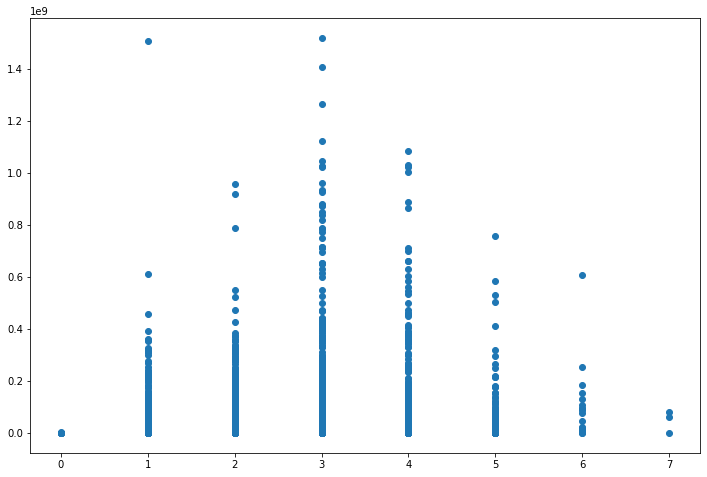

In [210]:
plt.figure(figsize=(12,8))
plt.scatter("genre_count", "revenue", data=train)
plt.show()

In [211]:
#train.head()
#list_of_genres = []
#for l in train['list_of_genres']:
#    for gen in l:
#        list_of_genres.append(gen)

#list_of_genres
#len(list_of_genres)
#unique_genres = set(list_of_genres)
#unique_genres
#len(unique_genres)
#Counter(list_of_genres).most_common(12)

HOMEPAGE

In [212]:
train['hasHomepage'] = train['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)
train = train.drop(['homepage'], axis=1)

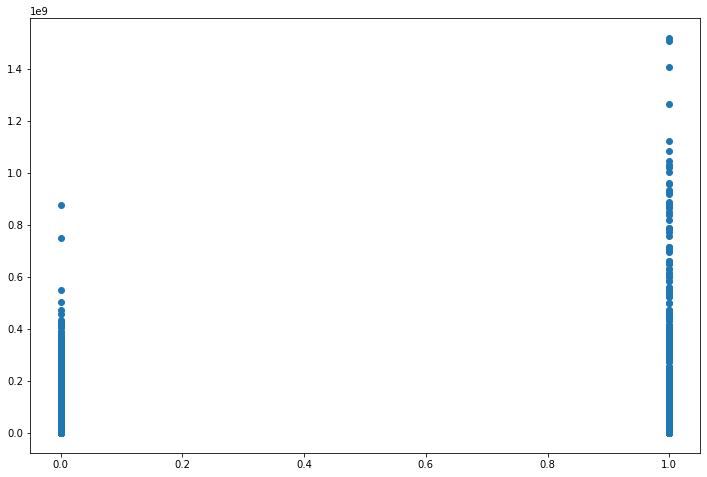

In [213]:
plt.figure(figsize=(12,8))
plt.scatter("hasHomepage", "revenue", data=train)
plt.show()

IMDB ID

In [214]:
train = train.drop(['imdb_id'], axis=1)


In [215]:
train

,budget,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,...,tagline,title,Keywords,cast,crew,revenue,has_collection,isBudgetDirty,genre_count,hasHomepage
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,1,0
2,4.000000e+07,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,4,0
3,3.300000e+06,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,1,1
4,1.200000e+06,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,2,1
5,3.142419e+07,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,...,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,0,1,2,0
2997,3.142419e+07,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,102.0,...,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,0,1,2,0
2998,6.500000e+07,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.0,...,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,0,0,4,0


ORIGINAL LANGUAGE

In [216]:
list_of_languages = []
for lan in train['original_language']:
    list_of_languages.append(lan)
print(Counter(list_of_languages))
unique_languages = set(list_of_languages)
len(unique_languages)

Counter({'en': 2575, 'fr': 78, 'ru': 47, 'es': 43, 'hi': 42, 'ja': 37, 'it': 24, 'ko': 20, 'cn': 20, 'zh': 19, 'de': 18, 'ta': 16, 'sv': 8, 'nl': 6, 'pt': 6, 'fa': 5, 'da': 5, 'ro': 4, 'tr': 3, 'hu': 3, 'te': 2, 'fi': 2, 'no': 2, 'pl': 2, 'ml': 2, 'sr': 1, 'cs': 1, 'mr': 1, 'el': 1, 'ur': 1, 'he': 1, 'ar': 1, 'nb': 1, 'vi': 1, 'bn': 1, 'id': 1})


36

In [217]:
train['is_english'] = train['original_language'].apply(lambda x: 1 if (x == 'en') else 0)
train = train.drop(['original_language'], axis=1)

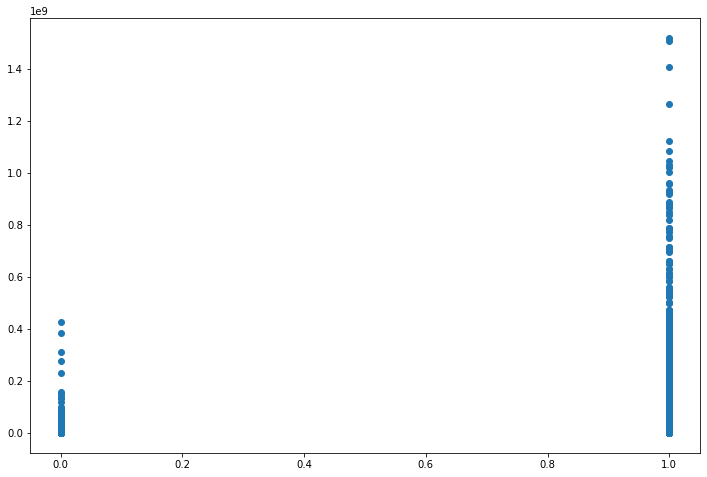

In [218]:
plt.figure(figsize=(12,8))
plt.scatter("is_english", "revenue", data=train)
plt.show()

ORIGINAL TITLE

In [219]:
train = train.drop(['original_title'], axis=1)

OVERVIEW

In [220]:
train = train.drop(['overview'], axis=1)

POPULARITY

In [221]:
train['logPop'] = train['popularity'].apply(lambda x: np.log(x)) #prova

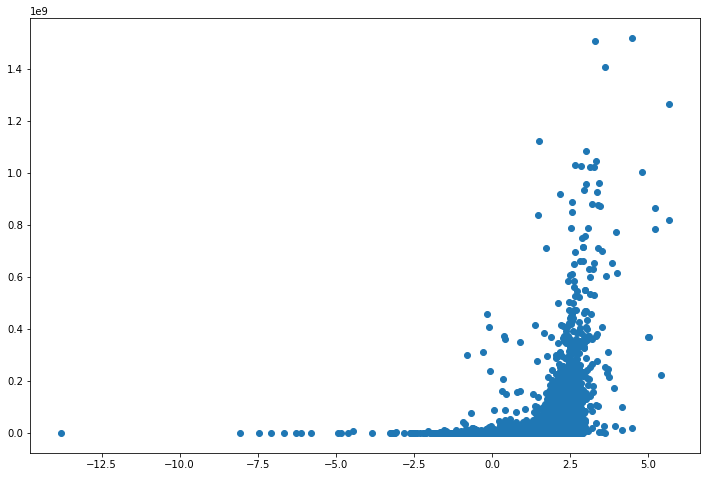

In [222]:
plt.figure(figsize=(12,8))
plt.scatter("logPop", "revenue", data=train)
plt.show()

In [223]:
train = train.drop(['logPop'], axis=1)

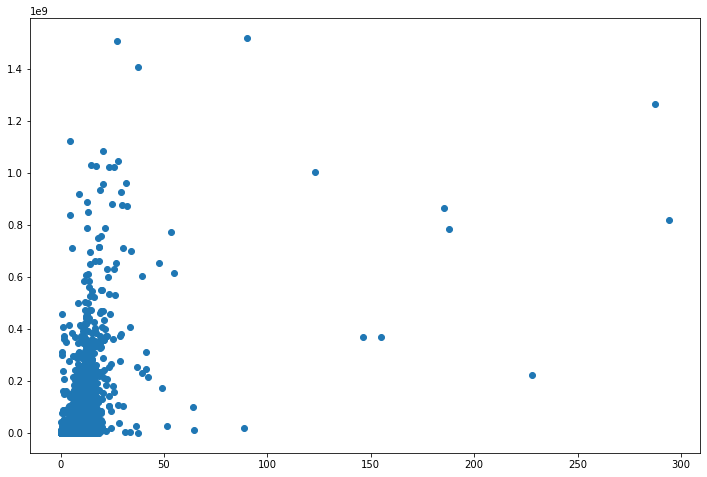

In [224]:
plt.figure(figsize=(12,8))
plt.scatter("popularity", "revenue", data=train)
plt.show()

POSTER PATH

In [225]:
train = train.drop(['poster_path'], axis=1)

PRODUCTION COMPANIES

In [226]:
for i, e in enumerate(train['production_companies']):
    for comp in e:
        print(comp['name'])

Paramount Pictures
United Artists
Metro-Goldwyn-Mayer (MGM)
Walt Disney Pictures
Bold Films
Blumhouse Productions
Right of Way Films
Ghost House Pictures
North Box Productions
Walt Disney Pictures
Jim Henson Productions
Jim Henson Company, The
Castle Rock Entertainment
United Artists
Twentieth Century Fox Film Corporation
Amercent Films
American Entertainment Partners L.P.
Interscope Communications
DreamWorks SKG
Jinks/Cohen Company
Double Feature Films
Jersey Films
Nina Saxon Film Design
Metro-Goldwyn-Mayer (MGM)
DreamWorks SKG
Cruise/Wagner Productions
Amblin Entertainment
Twentieth Century Fox Film Corporation
Blue Tulip Productions
Ronald Shusett/Gary Goldman
Digital Image Associates
Hypnopolis
DreamWorks SKG
Craven-Maddalena Films
BenderSpink
BBC Films
Headline Pictures
Magnolia Mae Films
Taeoo Entertainment
UK Film Council
Prescience
Aegis Film Fund
Kaleidoscope Films
Twentieth Century Fox Film Corporation
Current Entertainment
TF1 Films Production
Canal+
TPS Star
EuropaCorp
Sea 

Morgan Creek Productions
Paramount Pictures
Columbia Pictures
Innovisions
Schorr Pictures
Provenance Pictures
RCR Pictures
Davis-Films
Nu Image Films
LionsGate
Millennium Films
Ex3 Productions
Fipex Holding
United Artists
Arte France Cinéma
Forthcoming Productions
Beachfront Films
Chimera Films LLC
Informant Media
Metro-Goldwyn-Mayer (MGM)
Walt Disney Pictures
Spyglass Entertainment
Vertigo Entertainment
Kennedy/Marshall Company, The
Mandeville Films
Winking Productions
Lawrence Bender Productions
Marty Katz Productions
Twentieth Century Fox Film Corporation
River Road Entertainment
Participant Media
Universal Pictures
TriStar Pictures
Allied Filmmakers
Pricel
Lightmotive
Twentieth Century Fox Film Corporation
Kroyer Films
Youngheart Productions
FAI Films
Filmax
Cinema City Company Limited
Palace Pictures
Vision PDG
Hollywood Pictures
Summit Entertainment
Maverick Films
Imprint Entertainment
Sunswept Entertainment
Temple Hill Entertainment
Vertigo Entertainment
Energy Entertainment
Rat

DreamWorks SKG
Amblin Entertainment
Di Bonaventura Pictures
Platinum Dunes
thinkfilm
SprocketHeads
Hasbro Studios
Revolution Sun Studios
United Artists
Joseph E. Levine Productions
Columbia Pictures Corporation
Barclays Mercantile Industrial Finance
Parts and Labor
Olympus Pictures
Focus Features
Thinkfilm
Showbox
1492 Pictures
Dune Entertainment
Fox 2000 Pictures
Sunswept Entertainment
Dune Entertainment III
TSG Entertainment
The Mark Gordon Company
Vendome Pictures
One Race Productions
MHF Zweite Academy Film
Yari Film Group Releasing
Bob Yari Productions
Syndicate Films International
Bob DeBrino Entertainment
BDE Entertainment
Crossroads Entertainment (II)
Three Wolves Productions
BIM Distribuzione
Fox Film Corporation
Twentieth Century Fox Film Corporation
Crossbow Productions
Warner Bros. Family Entertainment
Walt Disney Pictures
Caravan Pictures
Huayi Brothers Media Corporation
Twentieth Century Fox Film Corporation
Screen Gems
Unique Features
Media 8 Entertainment
Empire Films
A

Masada Productions
Metro-Goldwyn-Mayer (MGM)
Twentieth Century Fox Film Corporation
Fanfare Films
American International Productions
Otis Productions
Universal Studios
Twentieth Century Fox Film Corporation
Embassy International Pictures
Legend Production Company
Twentieth Century Fox Film Corporation
Regency Enterprises
KirchMedia
Touchstone Pictures
Silver Screen Partners IV
Touchstone Pictures
London Film Productions
British Lion Film Corporation
The Criterion Collection
Fine Line Features
Kartemquin Films
Cross Creek Pictures
Dragonfly Entertainment
Vertebra Films
Sobras Producciones
Hammer Film Productions
EFTI
Exclusive Media Group
Overture Films
Columbia Pictures
Rogue Pictures
Relativity Media
Hydraulx
Rat Entertainment
Transmission Pictures
DC Comics
Legendary Pictures
Warner Bros.
DC Entertainment
Syncopy
Miramax Films
Tapestry Films
Simon Fields Productions
Guber/Peters Company
Roven Productions
Carolco Pictures
Columbia Pictures Corporation
Conspiração Filmes
Columbia TriSt

double A Films
Magnolia Pictures
Jigsaw Productions
CNN Films
Film4
Thin Man Films
Paramount Pictures
Marianne Productions
Adel Productions
Burrundi Productions
The Australian Children's Television Foundation
Amblin Entertainment
The Guber-Peters Company
Warner Bros.
Malpaso Productions
Malpaso Company, The
Blue Sky Studios
Twentieth Century Fox Animation
Mark Johnson Productions
Gran Via Productions
Curmudgeon Films
TV Tokyo
Gainax
Movic
SEGA
Toei Animation
Kadokawa Shoten Publishing Co.
Production I.G.
Project Eva
Star Child Recording
Eon Productions
Metro-Goldwyn-Mayer (MGM)
Shochiku Company
BBC Films
Working Title Films
British Screen Productions
Uplink Co.
Dimension Films
Troublemaker Studios
Miramax
France 2 Cinéma
Why Not Productions
Canal+
Ciné+
Région Ile-de-France
Page 114
France Télévisions
Cofinova 11
La Banque Postale Image 8
Indéfilms 3
Palatine Étoile 12
Cinémage 9
A Plus Image 5
SofiTVciné 2
Soficinéma 11
Columbia Pictures
Red Om Films
Plan B Entertainment
Touchstone Pi

Paramount Vantage
Miramax Films
Channel Four Films
Noel Gay Motion Picture Company
Figment Films
Film4
Hollywood Pictures
TriStar Pictures
Cannon Group
Golan-Globus
Warner Bros.
Twentieth Century Fox Film Corporation
Capitol Films
Hercules Films
BBC Films
Qwerty Films
Pathé
Metro-Goldwyn-Mayer (MGM)
Morgan Creek Productions
Dominion Productions
Canal+
Studio Trite
Caméra One
Portobello Pictures
Bavaria Film
Odyssey Entertainment
ApolloMedia Distribution
Film and Music Entertainment (F&ME)
Q&Q Medien
Fox 2000 Pictures
Parkes+MacDonald Image Nation
Universal Pictures
Scott Free Productions
Metro-Goldwyn-Mayer (MGM)
Dino De Laurentiis Company
Saturn Films
Nu Image Films
Edward R. Pressman Film
Millennium Films
Polsky Films
Osiris Productions
Lieutenant Productions
Touchstone Pictures
Silver Screen Partners IV
All Girl Productions
Columbia Pictures Corporation
Albacore Productions Inc.
Focus Films
Isle of Man Film
Isle of Man Film Commission
IAC Film
Fox Searchlight Pictures
Wildwood Enter

In [227]:
train['list_of_companies'] = train['production_companies'].apply(lambda x: [comp['name'] for comp in x])

In [228]:
list_of_companies = []
for l in train['list_of_companies']:
    for comp in l:
        list_of_companies.append(comp)

print(len(list_of_companies))
unique_companies = set(list_of_companies)
print(len(unique_companies))
top_20_comp_pair = Counter(list_of_companies).most_common(20)
top_20_comp = []
for p in top_20_comp_pair:
    top_20_comp.append(p[0])

8095
3695


In [229]:
train['companies_count'] = train['list_of_companies'].apply(lambda x: len(x))

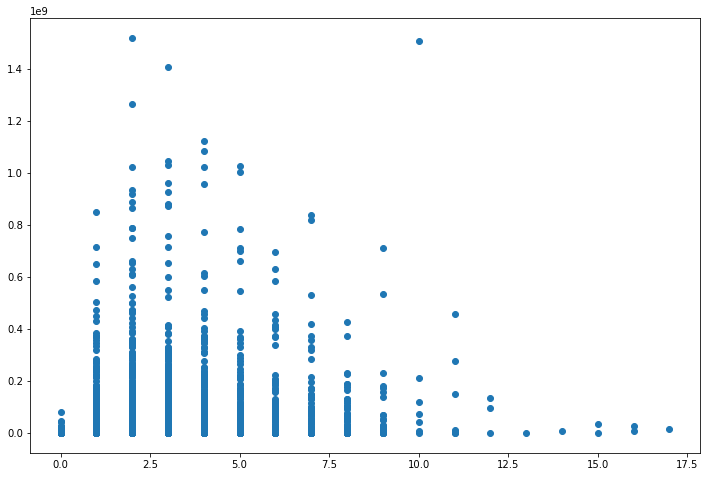

In [230]:
plt.figure(figsize=(12,8))
plt.scatter("companies_count", "revenue", data=train)
plt.show()

In [231]:
checked_companies = []
for i, l in enumerate(train['list_of_companies']):
    for comp in l:
        colName = 'is'+comp
        if(comp in top_20_comp and comp not in checked_companies):
            checked_companies.append(comp)
            train[colName] = pd.Series([1 if comp in x else 0 for x in train['list_of_companies']], index =list(range(1,3001)))


In [232]:
print(sum(train['isColumbia Pictures Corporation']))
top_20_comp_pair

61


[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30)]

In [233]:
train = train.drop(['production_companies'], axis=1)
train = train.drop(['list_of_companies'], axis=1)
train = train.drop(['companies_count'], axis=1)

In [241]:
train

,budget,popularity,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,...,isColumbia Pictures Corporation,isTriStar Pictures,isColumbia Pictures,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",...,0,0,0,0,0,0,0,0,0,0
2,4.000000e+07,8.248895,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",...,0,0,0,0,0,0,0,0,0,0
3,3.300000e+06,64.299990,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",...,0,0,0,0,0,0,0,0,0,0
4,1.200000e+06,3.174936,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",...,0,0,0,0,0,0,0,0,0,0
5,3.142419e+07,1.148070,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,"[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...",...,0,0,0,0,0,0,0,0,0,0
2997,3.142419e+07,3.727996,"[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...",...,0,0,0,0,0,0,0,0,0,0
2998,6.500000e+07,14.482345,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...",...,0,0,0,0,0,0,0,0,0,0


isWarner Bros.


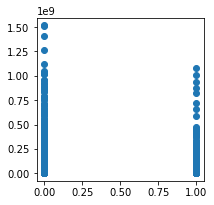

isUniversal Pictures


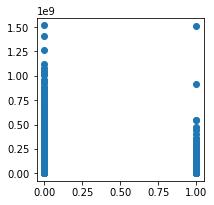

isParamount Pictures


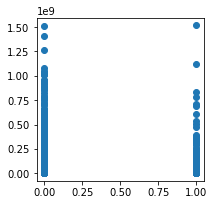

isTwentieth Century Fox Film Corporation


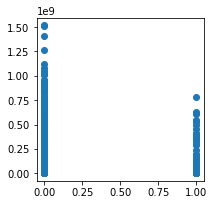

isColumbia Pictures


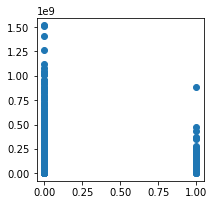

isMetro-Goldwyn-Mayer (MGM)


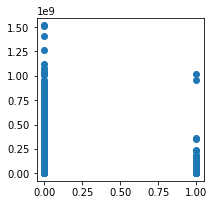

isNew Line Cinema


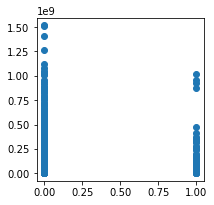

isTouchstone Pictures


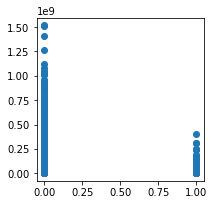

isWalt Disney Pictures


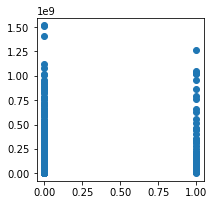

isColumbia Pictures Corporation


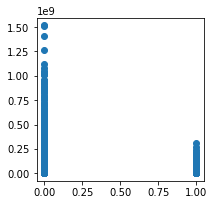

isTriStar Pictures


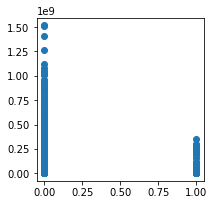

isRelativity Media


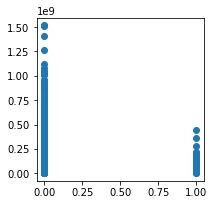

isCanal+


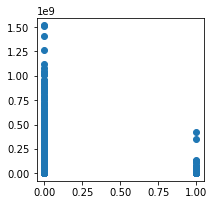

isUnited Artists


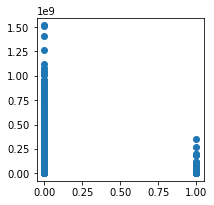

isMiramax Films


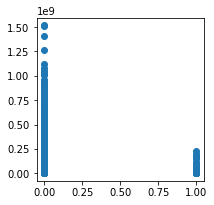

isVillage Roadshow Pictures


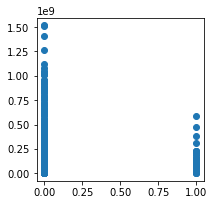

isRegency Enterprises


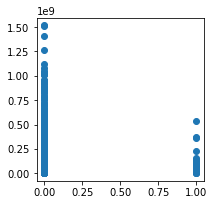

isBBC Films


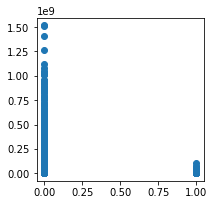

isDune Entertainment


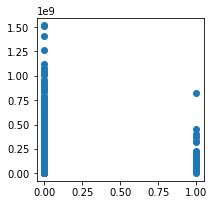

isWorking Title Films


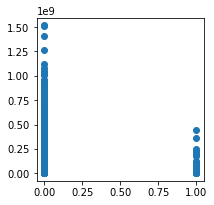

In [246]:
for comp in top_20_comp:
    col = 'is' + comp
    print(col)
    plt.figure(figsize=(3,3))
    plt.scatter(col, "revenue", data=train)
    plt.show()

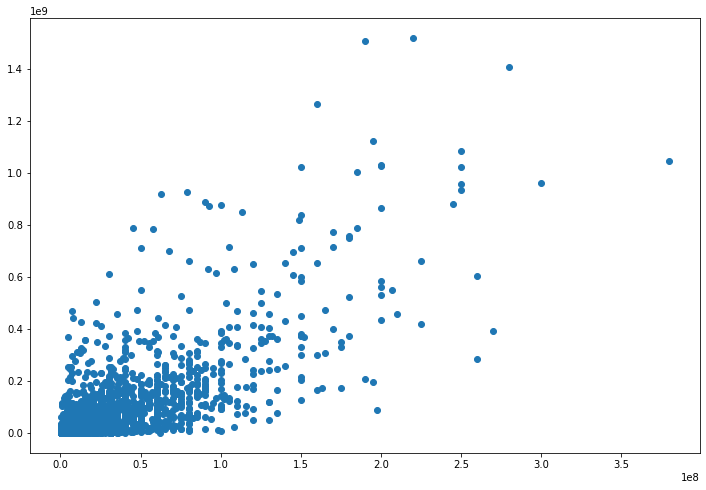

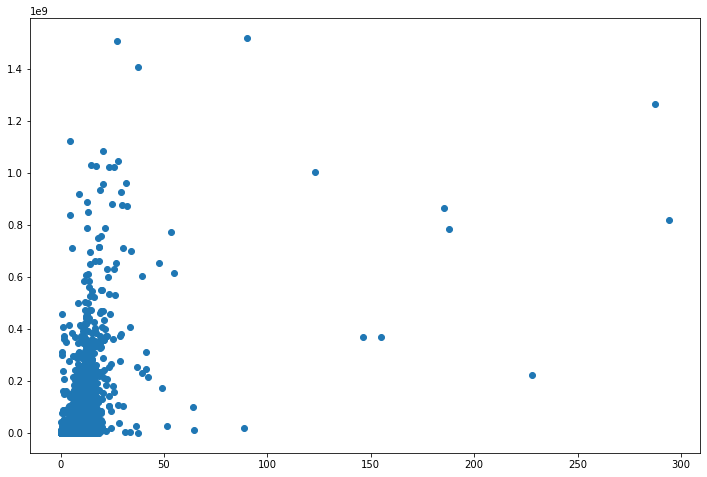

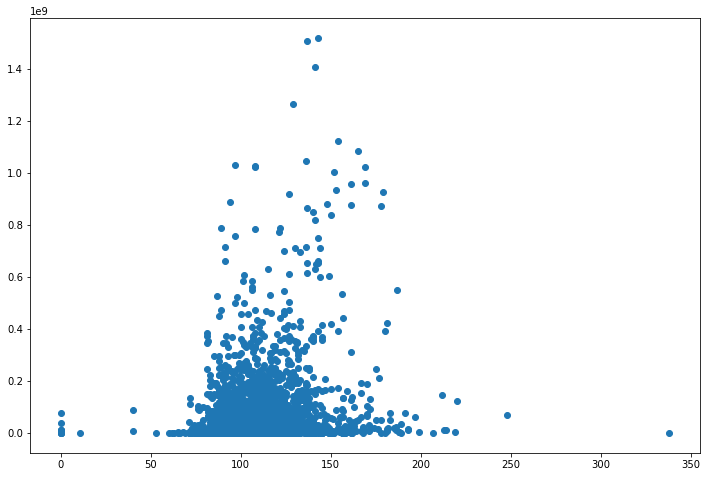

In [235]:
plt.figure(figsize=(12,8))
plt.scatter("budget", "revenue", data=train)
plt.show()

plt.figure(figsize=(12,8))
plt.scatter("popularity", "revenue", data=train)
plt.show()

plt.figure(figsize=(12,8))
plt.scatter("runtime", "revenue", data=train)
plt.show()
